<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

***Malignant (M):*** A malignant diagnosis means that the condition is cancerous. These cells are characterized by uncontrolled growth that can spread to other parts of the body and are often more serious and potentially life-threatening.

***Benign (B):*** A benign diagnosis refers to a condition that is not cancerous. Benign conditions are generally less serious and are not typically life-threatening. They don't spread to other parts of the body and often can be removed with less risk of recurrence.


Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### **Problem Statement:**

Breast cancer is a significant health concern, with early and accurate diagnosis being critical for effective treatment and improved patient outcomes. The dataset at hand includes diagnostic information from cell nuclei characteristics in breast mass samples, categorized as benign (B) or malignant (M). The aim of this analysis is to leverage machine learning techniques to distinguish between benign and malignant cases based on ten real-valued features that describe the qualities of cell nuclei in breast masses.

The initial tasks will involve performing a preliminary exploratory data analysis (EDA) to understand the distribution and relationships of these features with respect to the diagnosis. We will assess patterns, trends, and anomalies within the dataset and prepare the data for subsequent predictive modeling. The goal is to develop a predictive model that can accurately classify a tumor as benign or malignant based on the given features, thereby aiding in the early detection and diagnosis of breast cancer.

This analysis could serve as a cornerstone for developing a decision support tool for healthcare providers, enhancing the accuracy of breast cancer screening and diagnosis. The successful completion of this project would also contribute to the broader objective of improving healthcare outcomes through data-driven insights.



### Task 1: Loading Libraries and Data

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library
import matplotlib.pyplot as plt
import time

In [10]:
 data = pd.read_csv('/content/breast_cancer_wisconsin.csv')

<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features


In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [19]:
y = data.diagnosis
drop_col = ['id', 'diagnosis']
x = data.drop(drop_col, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
print(y.head())
print(y.tail())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object


### Task 3: Plot Diagnosis Distributions


Number of Benign Tumors 357
Number of Maglignant Tumors 212


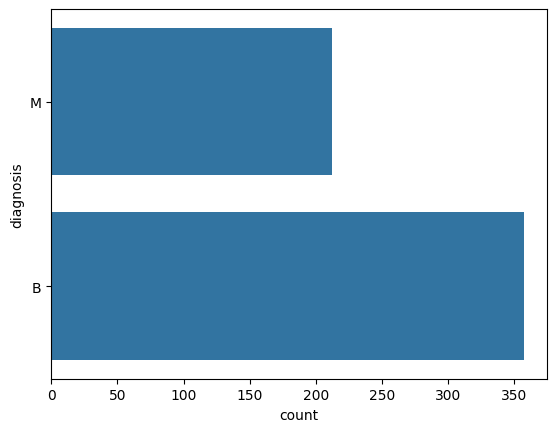

In [20]:
ax = sns.countplot(y, label="Count")
B, M = y.value_counts()
print('Number of Benign Tumors', B)
print('Number of Maglignant Tumors', M)

**Observations:**

* The number above the chart indicates there are 357 benign tumors and 212
malignant tumors in the dataset.
* The 'B' category, representing benign tumors, has a significantly higher count, suggesting that within this dataset, more tumors are classified as non-cancerous than cancerous.
* The 'M' category has a lower count, indicating fewer instances of malignant tumors.

In [21]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2 align=center> Data Visualization </h2>

---

### Task 4: Visualizing Standardized Data with Seaborn

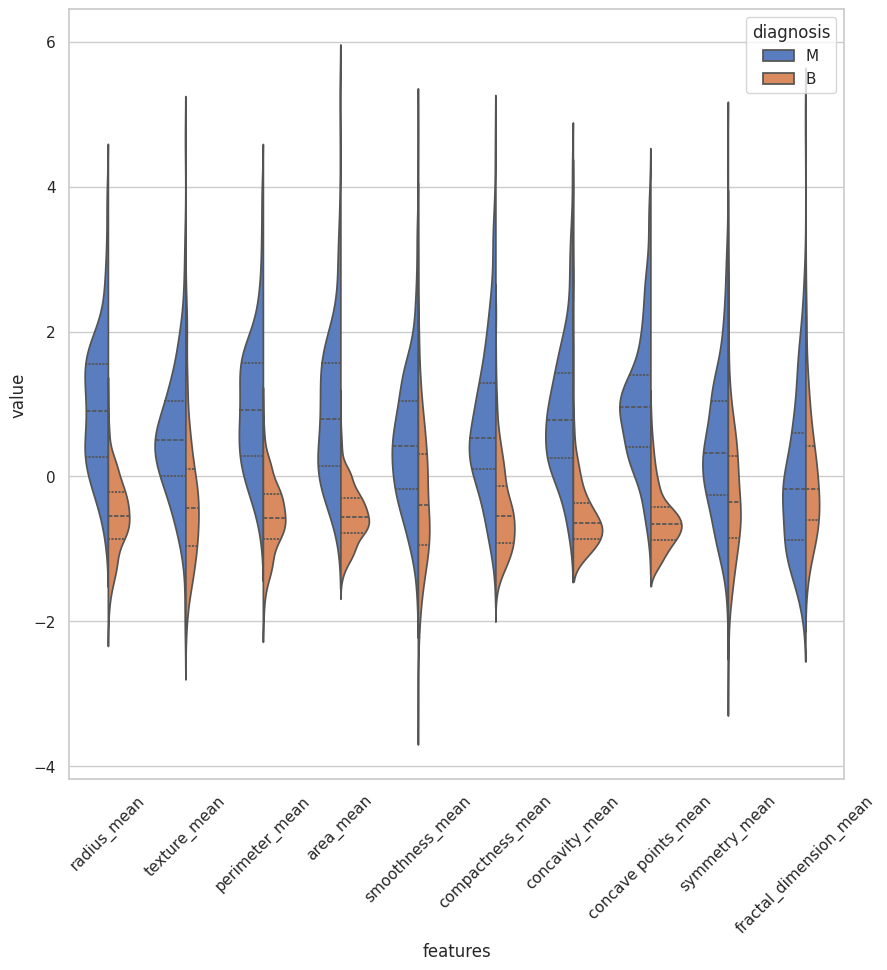

In [32]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize = (10, 10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

**Interpretation of the Violin Plot:**
The violin plot shows the distribution of standardized values for the 10 different features of the cell nuclei, separated by diagnosis (M = malignant, B = benign). The 'violin' shape of each plot shows the density of points at different values of the feature, with thicker sections representing a higher density of data points.

From the plot, we can interpret several things like:

* ***Feature Differences:*** Some features like 'radius_mean', 'perimeter_mean', and 'area_mean' show a clear separation between the distributions for benign and malignant diagnoses, indicating they could be strong indicators for predicting the diagnosis.
* ***Overlapping Distributions:*** Features like 'smoothness_mean' and 'symmetry_mean' show more overlap between malignant and benign diagnoses, suggesting they might not be as strong predictors on their own.
* ***Outliers:*** The width of the 'violins' also suggests the presence of outliers, especially for malignant cases in features like 'area_mean' where the violin plot has a long tail.
* ***Quartiles:*** The inner quartile markers show the median and the first and third quartiles within each distribution, which can give an idea about the spread and the skewness of the data for each feature and diagnosis category.

### Task 5: Violin Plots and Box Plots


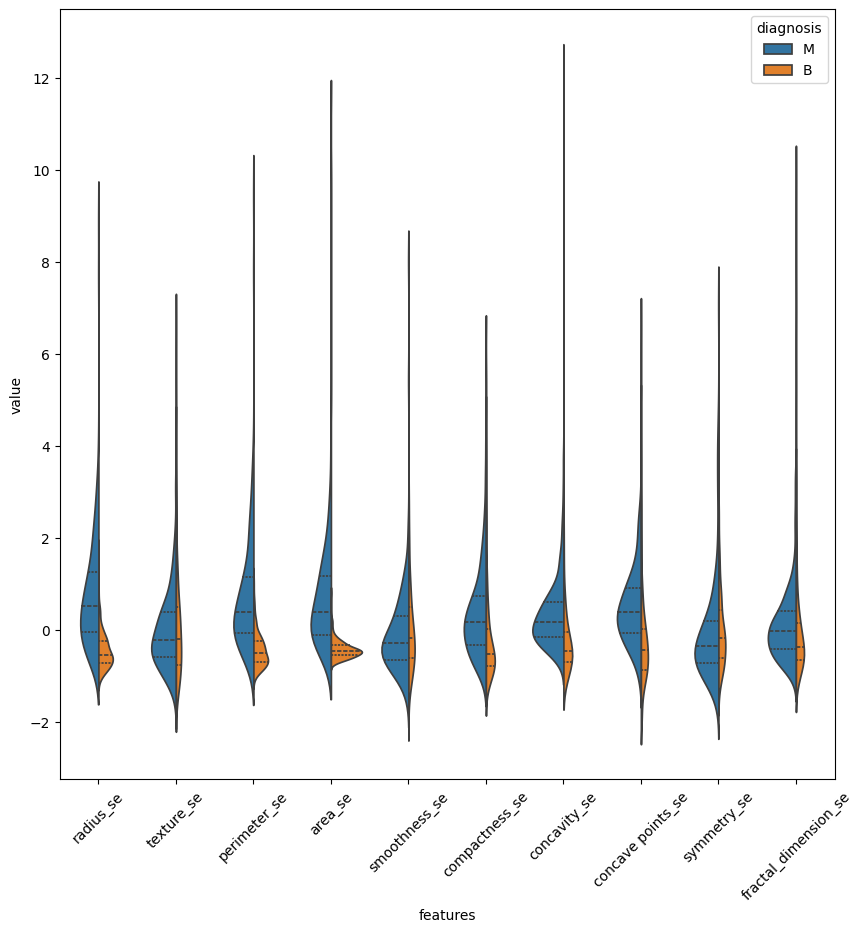

In [23]:
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize = (10, 10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

**Interpretation:** The features here have the suffix '_se', which commonly stands for "standard error" and indicates that these are measures of the variability of each feature.

From the plot, the following observations can be made:

* ***Height of the Violins:*** Some features show high peaks (indicating a lot of data points around a certain value), while others are more flat, which suggests a more uniform distribution of values.

* ***Width of the Violins:*** Features like 'area_se' and 'radius_se' have violins with wider sections, indicating greater variability for those features within the dataset.

* ***Difference Between Diagnoses:*** Some features, such as 'area_se' and 'radius_se', show a more pronounced difference between the two diagnoses, with the malignant group showing greater variability.

* ***Long Tails:*** Several features for the malignant group have long tails, which may suggest the presence of outliers or a long-range spread of values.

* ***Overlap Between Diagnoses:*** Like in the previous plot, certain features like 'smoothness_se' and 'symmetry_se' show considerable overlap between the malignant and benign groups.

* ***Median and Quartiles:*** The median (white dot) of some features such as 'concave points_se' and 'perimeter_se' is distinctly higher for the malignant group, which could be indicative of their relevance in distinguishing between malignant and benign tumors.


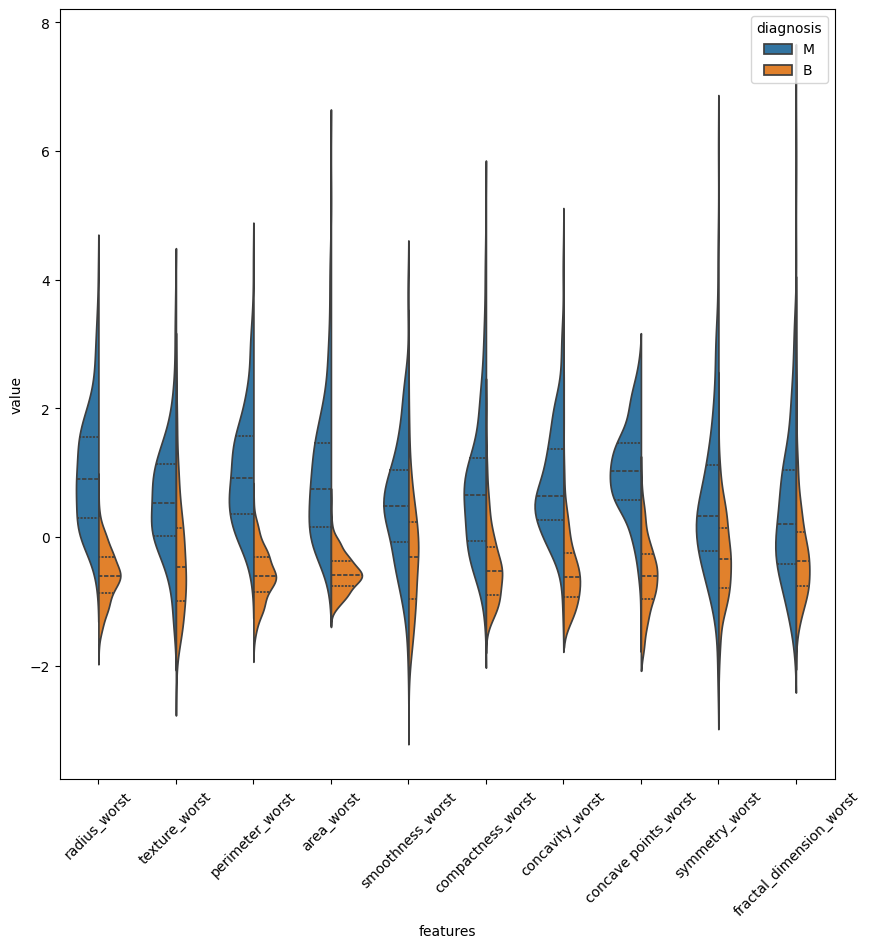

In [24]:
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize = (10, 10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=45);

**Interpretation:** In this violin plot, the features have the suffix "_worst", which typically refers to the worst or largest value found for that feature in the sample of cells from the tumor. These could be the maximum values of the radius, texture, perimeter, etc., of the cells being studied.

The plot presents a comparative view of these features for malignant (M) and benign (B) tumors. Observations can include:

- **Distributions**: The distribution of each feature across the two types of diagnosis (M for malignant and B for benign) is visible, and the full data distribution within each category can be compared.
- **Separability**: Features such as 'radius_worst', 'perimeter_worst', and 'area_worst' show clear separability between malignant and benign diagnoses, suggesting that larger values of these features are strongly associated with malignancy.
- **Skewness and Variability**: The plots may show skewness (asymmetry in the distribution) and variability within the groups. A longer tail on one side might indicate skewness. For example, features associated with size ('radius_worst', 'perimeter_worst', and 'area_worst') tend to have long tails, especially for malignant tumors, suggesting a wide range of larger values.
- **Outliers**: The long vertical lines extending from the violins indicate potential outliers or extreme values that are far from the bulk of the data.
- **Median Values**: The white dot represents the median of the distribution. In many cases, the median for the malignant category is higher than for the benign category, reinforcing the observation that worse values are generally associated with malignant tumors.
- **Density**: The width of the violin at different points indicates the density of data points. A wider section means more data points fall into that value range.

Overall, these 'worst' features are likely to be very predictive of the diagnosis. The clear separation between benign and malignant tumors for many of these features suggests that they could be key variables for any predictive models developed to distinguish between the two types of tumors.

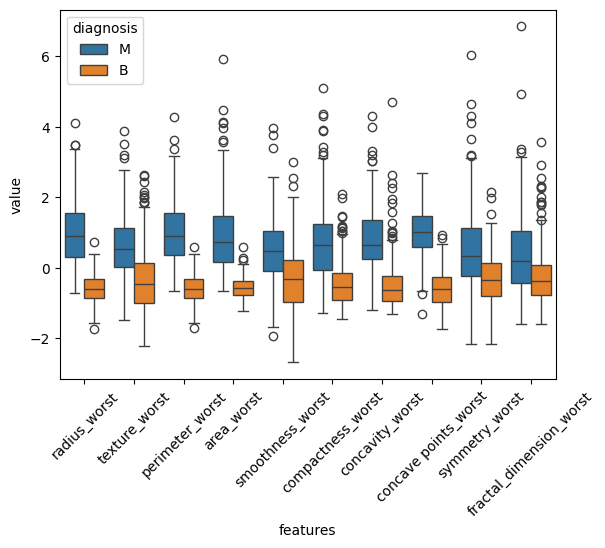

In [25]:
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

### Task 6: Using Joint Plots for Feature Comparison


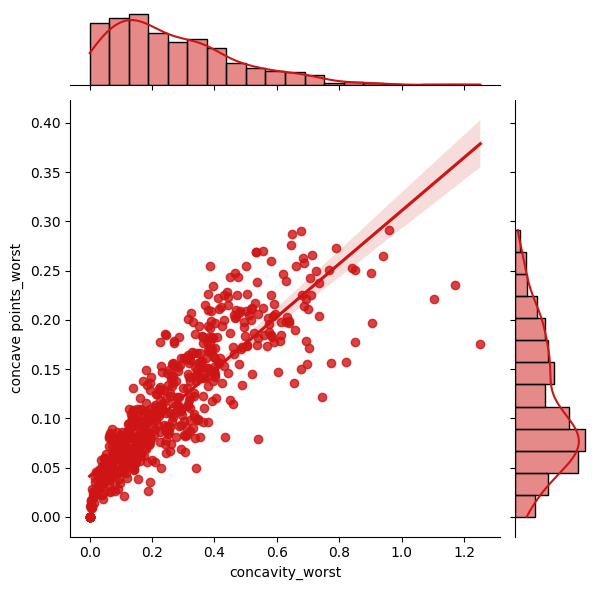

In [27]:
sns.jointplot(data=x, x="concavity_worst", y="concave points_worst", kind="reg", color="#ce1414");

**Interpretation:** This is a joint plot with a scatter plot in the center, a histogram on the top, and a histogram on the right. The scatter plot is showing the relationship between 'concavity_worst' and 'concave points_worst', two features from the dataset likely related to the severity of breast cancer tumors.

* ***Positive Correlation:*** The scatter plot in the center shows a strong positive correlation between 'concavity_worst' and 'concave points_worst'. As one increases, so does the other. This suggests that these features are related; as the concavity (severity of concave portions of the contour) of a tumor worsens, the number of concave points (severe points on the contour) also increases.

* ***Regression Line:*** The red line with the shaded area represents a linear regression fit to the data points, indicating the best linear approximation of the relationship between the two features. The shaded area around the regression line likely represents a confidence interval for this linear fit.

* ***Histograms:*** On the top and right are histograms showing the distribution of each of the individual features. These provide insight into the univariate distribution of each feature irrespective of the other.

* ***Distribution Shape:*** The histogram for 'concavity_worst' shows that most tumors have a lower score for this feature, with a right-skewed distribution (more values are on the left side of the histogram, with a tail stretching to the right). The same right skew is visible for 'concave points_worst'.

* ***Outliers:*** There are a few points that fall away from the main cluster in the scatter plot, which could be considered outliers. These are points where the relationship between 'concavity_worst' and 'concave points_worst' doesn't follow the general trend.


**Observation:**
* The strong correlation between 'concavity_worst' and 'concave points_worst' suggests they both contain similar information. For a predictive model, this could mean that including both features might not add additional value and could lead to overfitting. It could be worth considering only one of these features or combining them into a new feature through feature engineering.

* The distribution of the features informs us about the data's nature and can guide the preprocessing steps. For example, since the data is right-skewed, we might want to apply a transformation to normalize it.

* The presence of outliers could affect the performance of certain algorithms, so we may need to decide whether to keep these outliers or consider techniques to mitigate their impact.

### Task 7: Observing the Distribution of Values and their Variance with Swarm Plots


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.9% of the points cannot be plac

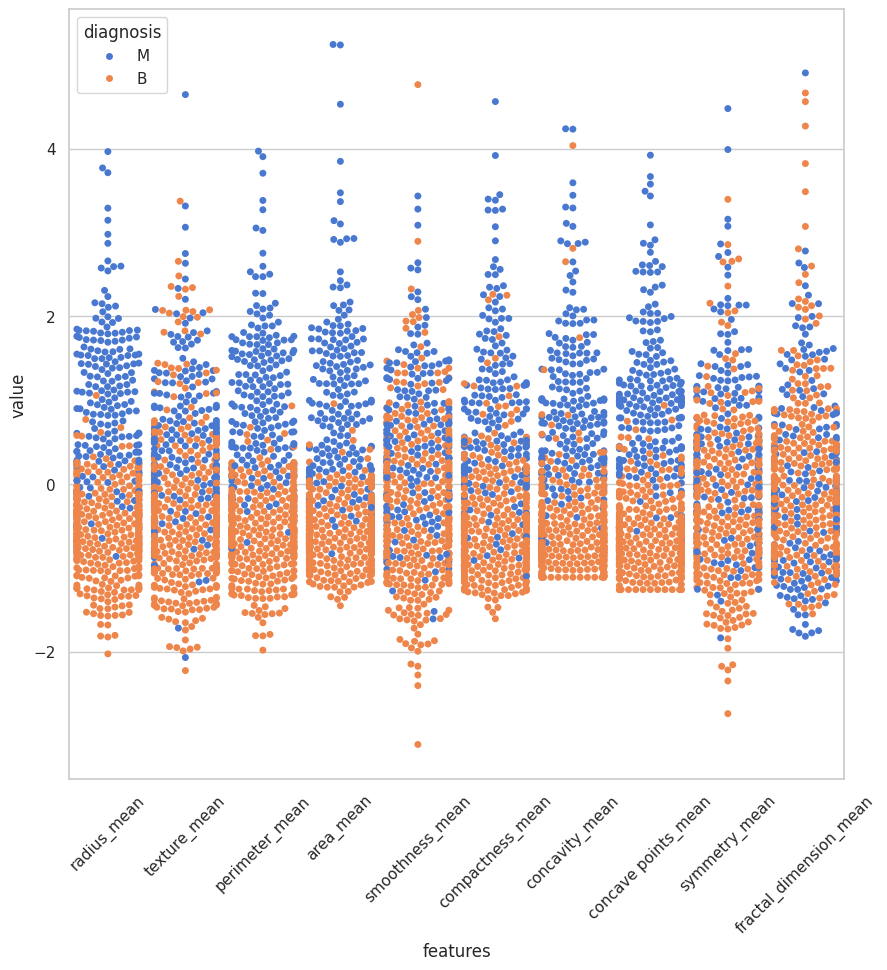

In [28]:
sns.set(style='whitegrid', palette='muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize = (10, 10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

The insights gained from this plot can inform several steps in the modeling process:

* Feature Selection: The plot indicates the features that are likely to provide more useful information for the classification task and should therefore be incorporated into the model.

* Data preprocessing involves addressing outliers and class imbalance before training the model. Approaches like resampling or resilient algorithms can be used.

* Model Complexity: To account for the overlapping distributions of some features, a model that can capture intricate interactions, such as ensemble methods or neural networks, may be necessary.

The utilization of this swarm plot enhances comprehension of the data, facilitating the development of a more precise and dependable model for categorizing breast cancer tumors.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 61.7% of the points cannot be plac

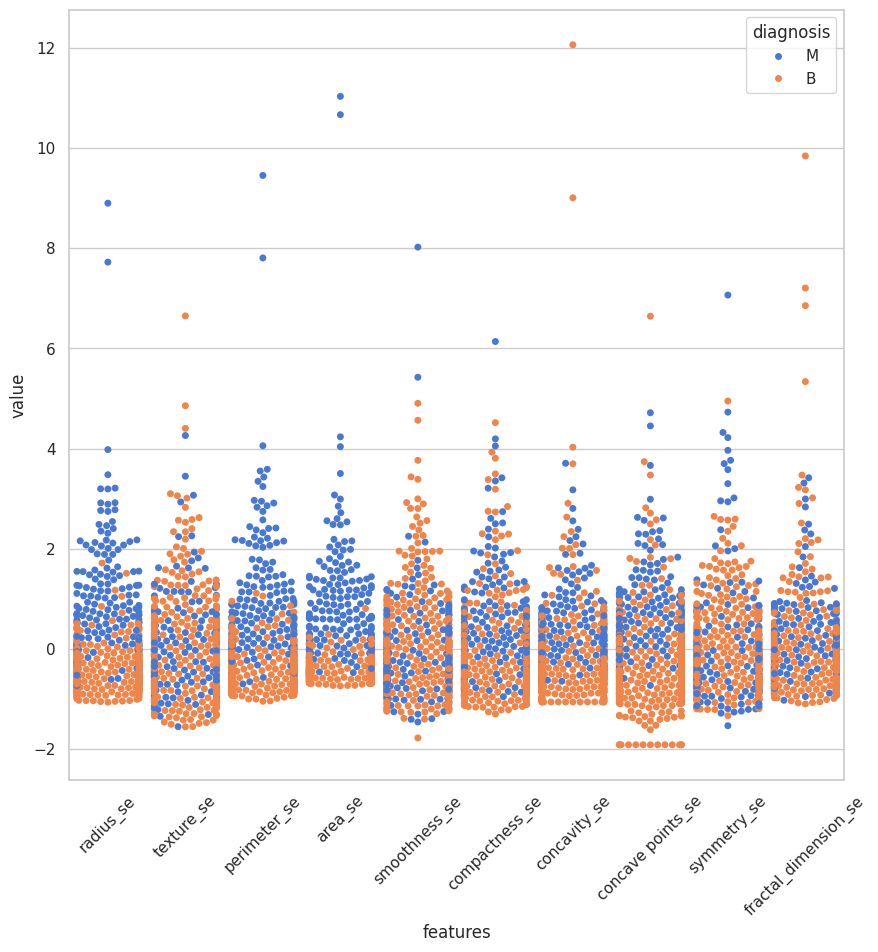

In [29]:
sns.set(style='whitegrid', palette='muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize = (10, 10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.9% of the points cannot be plac

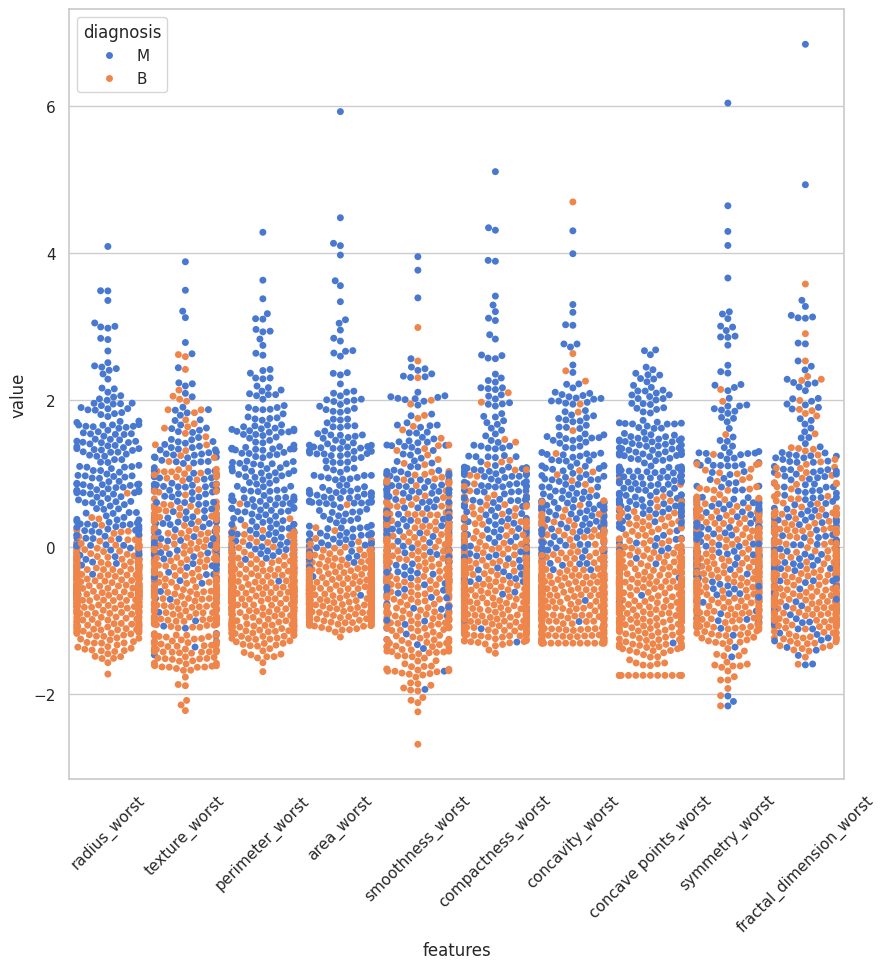

In [30]:
sns.set(style='whitegrid', palette='muted')
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize = (10, 10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45);

### Task 8: Observing all Pair-wise Correlations


<Axes: >

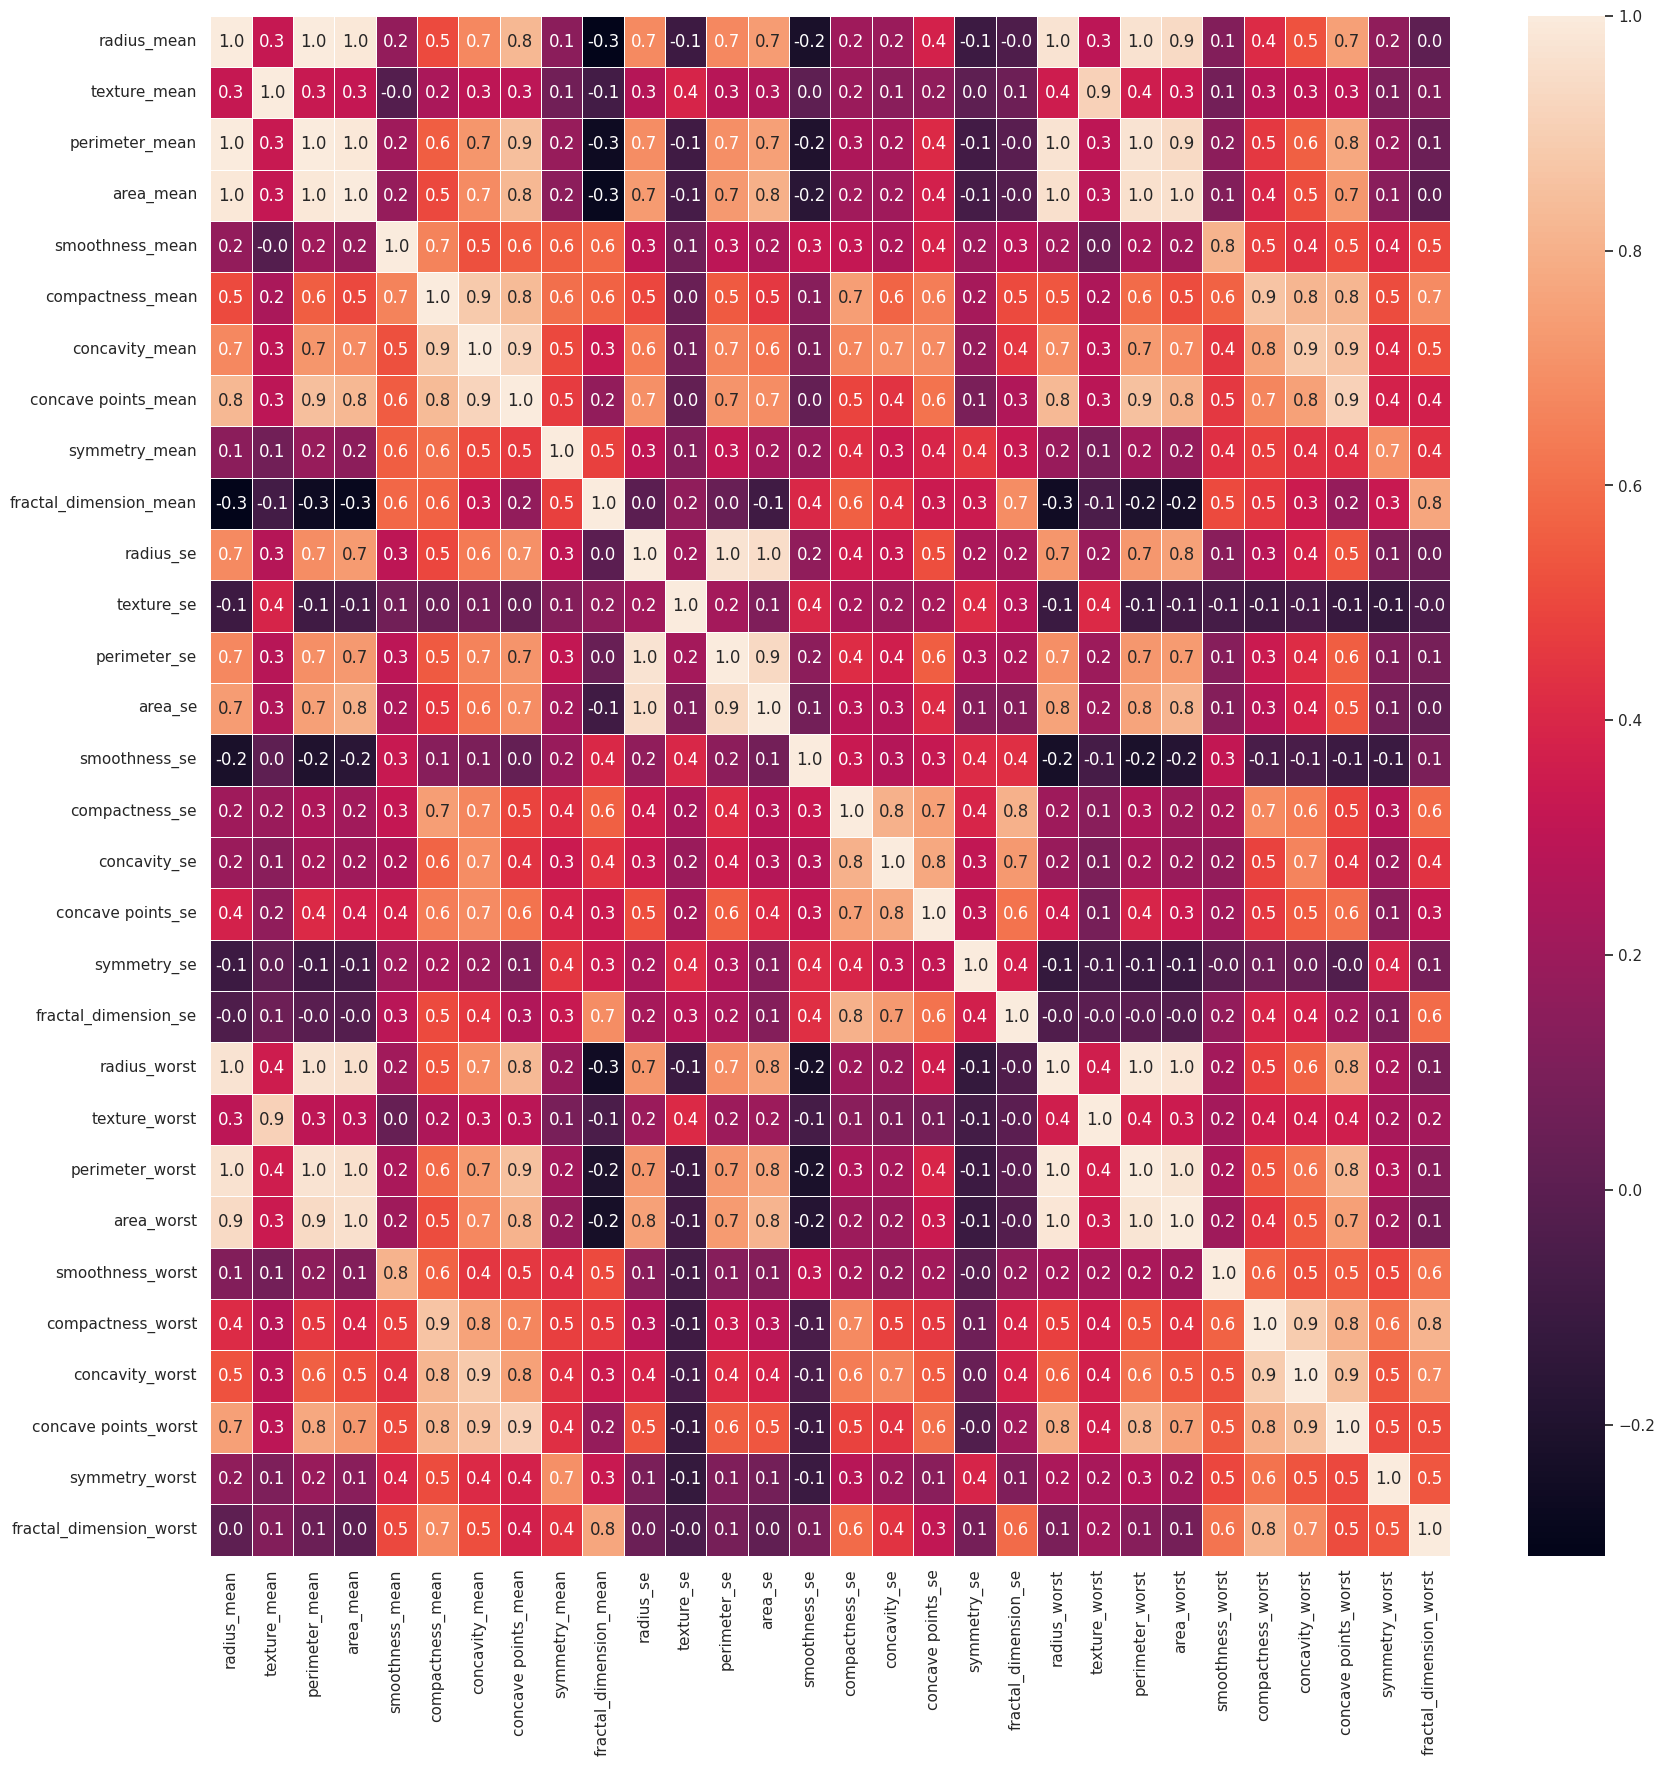

In [31]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

### Key Points and Further analysis:

**Summary:**
* ***Data Understanding:*** Visualizations such as violin plots, swarm plots, and heatmaps have improved the understanding of the distribution, variability, and correlation of features.
* ***Feature Relevance:*** Specific features, such as 'radius', 'perimeter', 'area', 'concavity', and 'concave points' in different measurements (mean, worst), have demonstrated significant predictive power because they distinctly differentiate between malignant and benign diagnoses.
* ***Correlation Analysis:*** The heatmap displayed strong correlations between multiple features, suggesting the possibility of redundancies. Due to multicollinearity, this can negatively impact the model's performance.
* ***Class imbalance:*** Visual analysis indicated a higher frequency of benign instances in comparison to malignant cases, which is a common challenge in medical datasets.
* ***Outliers:*** Anomalies have been detected in several characteristics for both diagnoses. They must be managed appropriately to ensure they do not affect the model's performance.
* ***Data Distribution:*** Numerous features have right-skewed distributions, necessitating adjustment to satisfy model assumptions (for models that assume input features are normally distributed).

**Next Actions:**
* ***Selection of features:*** Performing statistical tests to measure the predictive strength of each feature, taking into account the removal of strongly correlated characteristics to mitigate multicollinearity.
* ***Data preprocessing*** involves normalizing or standardizing features to account for changes in scale, applying transformations to address skewness, and handling outliers through either removal or the use of robust modeling techniques.
* ***Addressing Class Imbalance:*** To tackle the issue of class imbalance, one can employ approaches such as SMOTE, under-sampling, over-sampling, or utilize models that are innately adept at handling imbalanced data.
* ***Model Development:*** Constructing a diverse range of machine learning models, ranging from elementary ones such as logistic regression to more intricate ones like ensemble methods and neural networks.
* **Model Evaluation:** Utilizing suitable measures, taking into account the disparity in class distribution, such as precision, recall, F1-score, and ROC-AUC, rather than depending exclusively on accuracy.
* ***Hyperparameter tuning*** involves optimizing model parameters using cross-validation approaches such as Grid Search or Random Search in order to improve model performance.
* ***Model Validation:*** Employing rigorous validation methods, such as k-fold cross-validation, to evaluate the model's capacity to generalize to unfamiliar data.
* ***Interpretability*** is of utmost importance, particularly in a medical environment, and may vary depending on the model selected. It is necessary to take into account techniques for elucidating model predictions.
* ***Feature Engineering:*** Generating novel characteristics can better capture the fundamental biological processes.
* ***Incremental Learning:*** Due to the swift progress in medical research, the model must be constructed to seamlessly integrate new data and adjust to it, potentially employing an incremental learning methodology.
